In [ ]:
from itertools import compress
import random
import time
import matplotlib.pyplot as plt

from data import *
from queue import PriorityQueue

In [1]:
def initial_population(individual_size, population_size):
    return [[random.choice([True, False]) for _ in range(individual_size)] for _ in range(population_size)]

def fitness(items, knapsack_max_capacity, individual): # Po co jeszcze raz to deklarować?
    total_weight = sum(compress(items['Weight'], individual))
    if total_weight > knapsack_max_capacity:
        return 0
    return sum(compress(items['Value'], individual))

def population_best(items, knapsack_max_capacity, population):
    best_individual = None
    best_individual_fitness = -1
    for individual in population:
        individual_fitness = fitness(items, knapsack_max_capacity, individual)
        if individual_fitness > best_individual_fitness:
            best_individual = individual
            best_individual_fitness = individual_fitness
    return best_individual, best_individual_fitness

# My functions:

# Rodzice:

## Calculates sum of fitness values in population
def fitnesses(items, knapsack_max_capacity, population):
    fs = []
    max = -1

    for i in population:
        ft = fitness(items, knapsack_max_capacity, i)
        fs.append(ft)
        if ft > max:
            max = ft
    return max, fs

## Array of chances of the roulette wheel selection
def chance_distribution(fitnesses):
    # Each individual from the population contains the starting value of it's "chance zone" at it's index
    distribution = []
    start_pos = 0
    next = 0
    fitness_sum = sum(fitnesses)

    for i in fitnesses:
        chance = i / fitness_sum
        next = chance + start_pos
        distribution.append(next)
        start_pos = next

    return distribution

## Chooses an individual at the certain "chance zone" of a roulette
def choose_individual(chance, roulette):
    index = 0
    
    for i in roulette:
        if chance < i:
            return index
        index += 1

    return len(roulette) - 1   


# Dzieci:

## Evenly divides "genome" with one point
def children(parents_genome):
    children = [[],[]]

    parent_size = len(parents_genome) // 2
    point = parent_size // 2

    for i in range(0, parent_size):
        children[0].append(parents_genome[i + parent_size])
        children[1].append(parents_genome[i])
        if i == point: # It's time to change donor of genome
            temp = children[0]
            children[0] = children[1]
            children[1] = temp
            
    return children

## Generates indexes of pairs
def generate_pairs(n):
    # Initialize the array with the desired pattern
    array = []

    for i in range(0, n):
        pairs = []
        for j in range(0, n):
            if j != i:
                pairs.append(j)
        array.append(pairs)

    return array


## Generates children for all the parents from set
def generate_children(parents_population):
    result = []
    parents_count = len(parents_population)

    # Array of sets for every index. Each set contains possible pairs
    pairs = generate_pairs(parents_count)
    paired = []
    paired.append(0)

    # generate children for pairs
    for p in range(0, parents_count):
        # We want to skip parents which are already paired
        if p in paired:
            continue

        partner = random.randrange(0, len(pairs[p])) #choosing random partner
        
        paired.append(partner)
        
        # Remove both parents from the list of future pairs
        for rp in range(p + 1, parents_count):
            if rp in paired:
                continue
            pairs[rp].remove(p)
            pairs[rp].remove(partner)

        pair_result = children(parents_population[p] + parents_population[partner])
        
        # Some hardcoded values
        result.append(pair_result[0])
        result.append(pair_result[1])

    return result

## Seeks for top n elites to keep in the population (returns the array of indexes)
def get_elites(population, best_fitness, n_elites):
    elites = []
    size = len(population)

    best = PriorityQueue()

    for index in range(0, size):
        normalized_priority = fitness(population[index]) * 100 / best_fitness
        best.put((normalized_priority, index))

    for j in range(0, n_elites):
        elites.append(best.get())

    return elites


# Mutacja:

## Changes random bit in a choosen solution
def mutate(individual):
    index = random.randrange(0, len(individual))
    
    individual[index] = not individual[index]

    return individual 

def mutate_population(population):
    for i in population:
        i = mutate(i)
        
    return population
    

In [2]:
items, knapsack_max_capacity = get_big()
print(items)

NameError: name 'get_big' is not defined

In [ ]:
population_size = 100
generations = 200
n_selection = 20
n_elite = 1

start_time = time.time()
best_solution = None
best_fitness = 0
population_history = []
best_history = []
population = initial_population(len(items), population_size)

In [ ]:
for _ in range(generations):
    population_history.append(population)

    # TODO: implement genetic algorithm

    # TODO: wybór rodziców
    max_fit, fsum = fitnesses(items, knapsack_max_capacity, population)
    roulette = chance_distribution(fsum) 
    # example of roulette: [0.0, 0.0, 0.04, 0.24, 0.45, 0.69, 0.81, 0.81, 0.82, 0.99, 1.0]

    selected_indexes = set() # set of unique indexes

    for i in range(0, n_selection):
        index = choose_individual(random.randrange(0, 100) / 100, roulette) # index of chosen individual
        selected_indexes.add(index)

    # TODO: tworzenie dzieci
    parents_population = []

    for parent_index in selected_indexes:
        parents_population.append(population[parent_index])

    new_population = generate_children(parents_population)

    # TODO: mutacja 
    new_population = mutate_population(new_population)

    # TODO: aktualizacja populacji
    elites_indexes = get_elites(population, max_fit, n_elite)
    for ind in elites_indexes:
        new_population.append(population[ind])

    population = new_population

    best_individual, best_individual_fitness = population_best(items, knapsack_max_capacity, population)
    if best_individual_fitness > best_fitness:
        best_solution = best_individual
        best_fitness = best_individual_fitness
    best_history.append(best_fitness)

ValueError: list.remove(x): x not in list

In [ ]:
end_time = time.time()
total_time = end_time - start_time
print('Best solution:', list(compress(items['Name'], best_solution)))
print('Best solution value:', best_fitness)
print('Time: ', total_time)

Best solution: ['Diamond statue', 'Emerald belt', 'Fossil', 'Helmet', 'Jewel box', 'Knife', 'Necklace', 'Opal badge', 'Perls', 'Quiver', 'Ruby ring', 'Silver bracelet', 'Uniform', 'Venom potion', 'Yesteryear book']
Best solution value: 13489826
Time:  0.26878905296325684


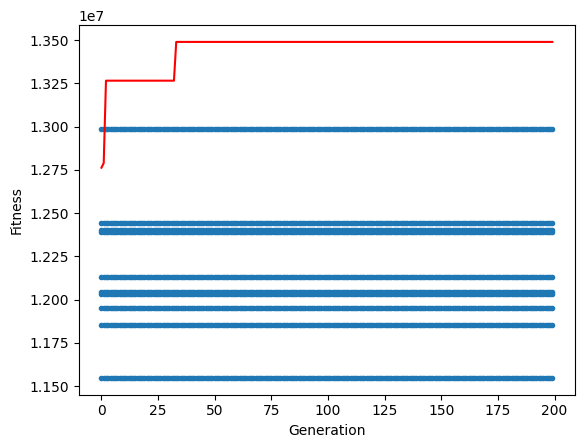

In [ ]:
# plot generations
x = []
y = []
top_best = 10
for i, population in enumerate(population_history):
    plotted_individuals = min(len(population), top_best)
    x.extend([i] * plotted_individuals)
    population_fitnesses = [fitness(items, knapsack_max_capacity, individual) for individual in population]
    population_fitnesses.sort(reverse=True)
    y.extend(population_fitnesses[:plotted_individuals])
plt.scatter(x, y, marker='.')
plt.plot(best_history, 'r')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()